# Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import os
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering 

# Load the dataset


In [2]:
data = pd.read_csv('CC GENERAL.csv')

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Exploratory Data Analysis


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
data["CUST_ID"].nunique()

8950

In [13]:
data["BALANCE"].describe()

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
25%        128.281915
50%        873.385231
75%       2054.140036
max      19043.138560
Name: BALANCE, dtype: float64

<Axes: ylabel='BALANCE'>

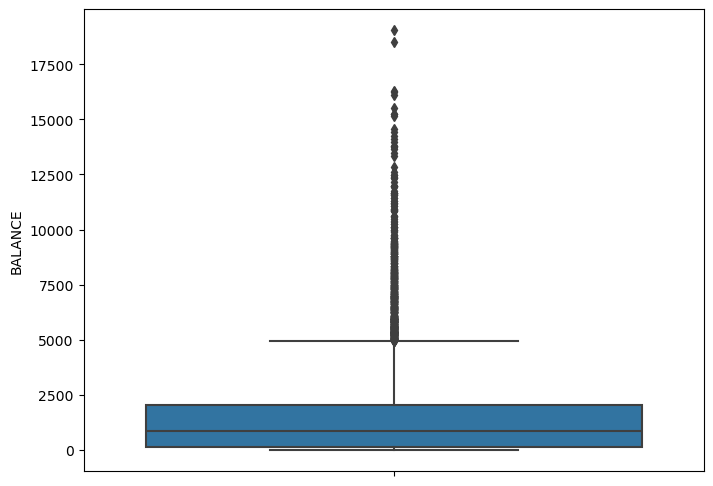

In [12]:
plt.figure(figsize = (8,6))
sns.boxplot(y = data["BALANCE"])

In [24]:
data["BALANCE_FREQUENCY"].describe()##La mayoria actualiza bastante su cuenta

count    8950.000000
mean        0.877271
std         0.236904
min         0.000000
25%         0.888889
50%         1.000000
75%         1.000000
max         1.000000
Name: BALANCE_FREQUENCY, dtype: float64

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BALANCE_FREQUENCY', ylabel='Count'>

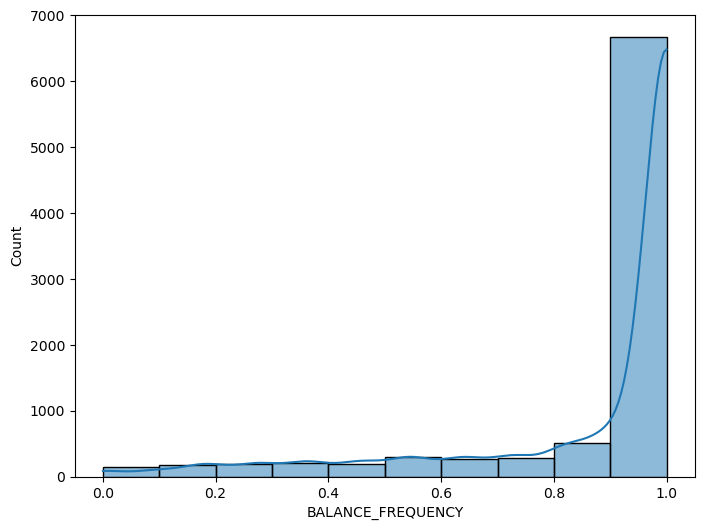

In [46]:
plt.figure(figsize=(8, 6)) 
sns.histplot(data["BALANCE_FREQUENCY"], bins=10, kde=True)

In [27]:
data["PURCHASES"].describe() ## 75% tiene mas de 1110 en compras
## 50% gastaron hasta 361 en compra

count     8950.000000
mean      1003.204834
std       2136.634782
min          0.000000
25%         39.635000
50%        361.280000
75%       1110.130000
max      49039.570000
Name: PURCHASES, dtype: float64

In [28]:
data["ONEOFF_PURCHASES"].describe() ## 25% no ha gastado nada(?)
####### Puede significar que prefieren pagar a plazo o usar tarjetas de credito

count     8950.000000
mean       592.437371
std       1659.887917
min          0.000000
25%          0.000000
50%         38.000000
75%        577.405000
max      40761.250000
Name: ONEOFF_PURCHASES, dtype: float64

In [31]:
data["INSTALLMENTS_PURCHASES"].describe()

count     8950.000000
mean       411.067645
std        904.338115
min          0.000000
25%          0.000000
50%         89.000000
75%        468.637500
max      22500.000000
Name: INSTALLMENTS_PURCHASES, dtype: float64

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='INSTALLMENTS_PURCHASES', ylabel='Count'>

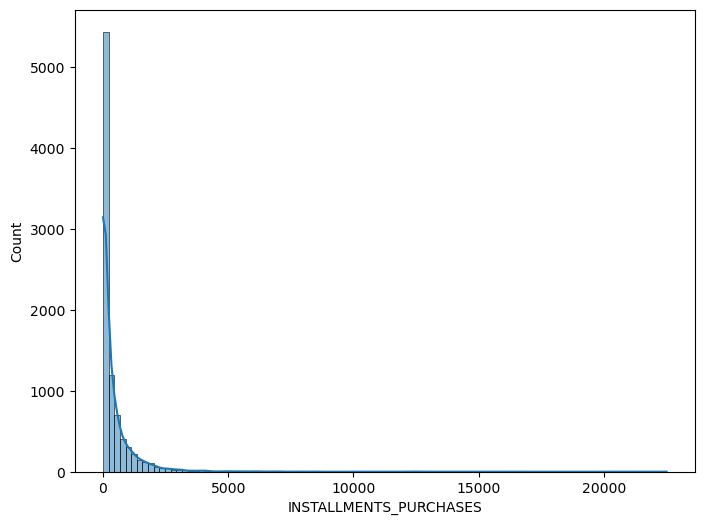

In [44]:
plt.figure(figsize=(8, 6)) 
sns.histplot(data["INSTALLMENTS_PURCHASES"], bins=100, kde=True)

In [35]:
data["CASH_ADVANCE"].value_counts()
##Con valores altos se puede considerar como clientes de riesgo

CASH_ADVANCE
0.000000       4628
495.425832        1
1486.243293       1
855.232779        1
3767.104707       1
               ... 
5187.029833       1
137.757459        1
124.941315        1
272.559361        1
127.040008        1
Name: count, Length: 4323, dtype: int64

In [33]:
data["CASH_ADVANCE"].describe()

count     8950.000000
mean       978.871112
std       2097.163877
min          0.000000
25%          0.000000
50%          0.000000
75%       1113.821139
max      47137.211760
Name: CASH_ADVANCE, dtype: float64

In [37]:
data["PURCHASES_FREQUENCY"].describe()

count    8950.000000
mean        0.490351
std         0.401371
min         0.000000
25%         0.083333
50%         0.500000
75%         0.916667
max         1.000000
Name: PURCHASES_FREQUENCY, dtype: float64

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PURCHASES_FREQUENCY', ylabel='Count'>

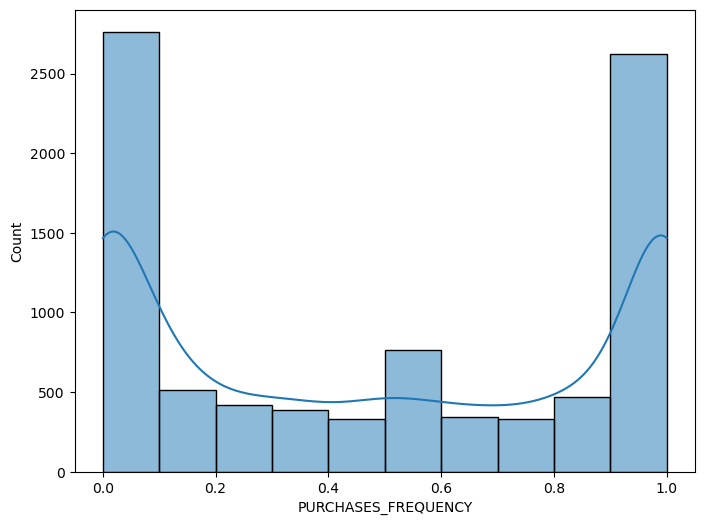

In [41]:
plt.figure(figsize=(8, 6)) 
sns.histplot(data["PURCHASES_FREQUENCY"], bins=10, kde=True)##Esta muy bien distribuido entre los que compran y los que no

In [51]:
data["ONEOFF_PURCHASES_FREQUENCY"].describe()## El 75% tiene una bajo uso del Oneoff method

count    8950.000000
mean        0.202458
std         0.298336
min         0.000000
25%         0.000000
50%         0.083333
75%         0.300000
max         1.000000
Name: ONEOFF_PURCHASES_FREQUENCY, dtype: float64

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ONEOFF_PURCHASES_FREQUENCY', ylabel='Count'>

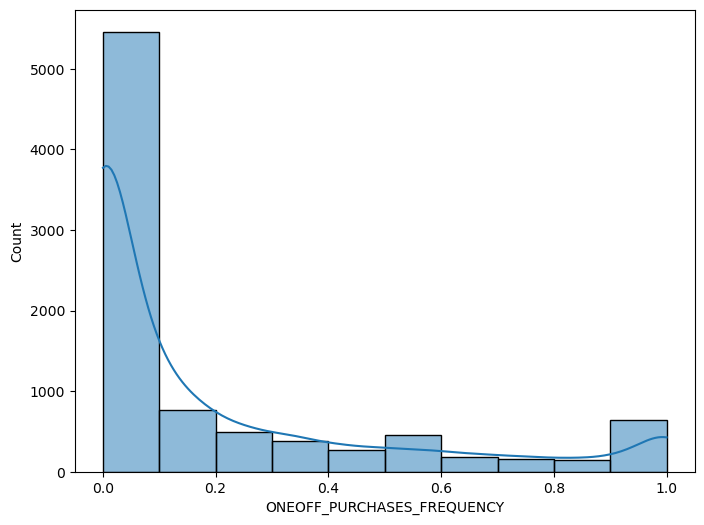

In [52]:
plt.figure(figsize=(8, 6)) 
sns.histplot(data["ONEOFF_PURCHASES_FREQUENCY"], bins=10, kde=True)##Esta muy bien distribuido entre los que compran y los que no

In [54]:
data["PURCHASES_INSTALLMENTS_FREQUENCY"].describe()

count    8950.000000
mean        0.364437
std         0.397448
min         0.000000
25%         0.000000
50%         0.166667
75%         0.750000
max         1.000000
Name: PURCHASES_INSTALLMENTS_FREQUENCY, dtype: float64

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PURCHASES_INSTALLMENTS_FREQUENCY', ylabel='Count'>

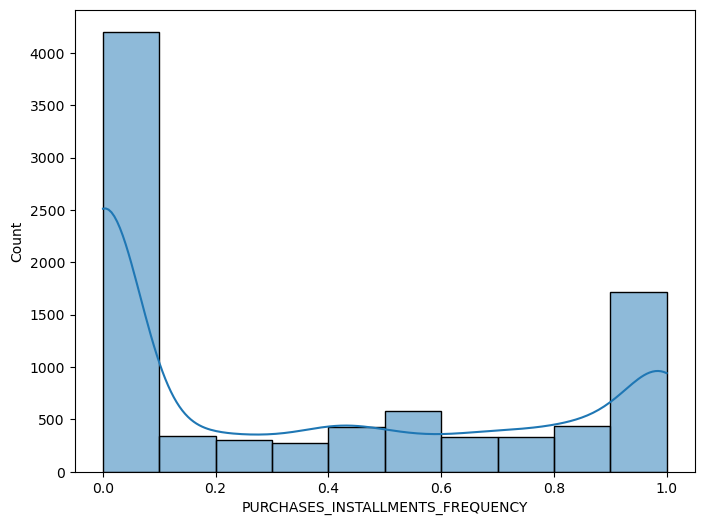

In [55]:
plt.figure(figsize=(8, 6)) 
sns.histplot(data["PURCHASES_INSTALLMENTS_FREQUENCY"], bins=10, kde=True)

In [56]:
data["CASH_ADVANCE_FREQUENCY"].describe() ## (?)1.5

count    8950.000000
mean        0.135144
std         0.200121
min         0.000000
25%         0.000000
50%         0.000000
75%         0.222222
max         1.500000
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

In [60]:
data[data["CASH_ADVANCE_FREQUENCY"]>1]## 8 valores con mayor a 1

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
681,C10708,5656.069801,1.000000,362.36,362.36,0.0,7240.433194,0.250000,0.250000,0.0,1.250000,12,2,8000.0,683.421497,2036.877611,0.0,8
1626,C11680,2876.009336,1.000000,152.61,152.61,0.0,3719.650168,0.333333,0.333333,0.0,1.166667,24,2,4000.0,248.342971,584.926336,0.0,6
2555,C12629,5906.184924,1.000000,141.80,141.80,0.0,1651.286918,0.125000,0.125000,0.0,1.125000,12,2,10000.0,933.969974,919.289675,0.0,8
2608,C12684,7801.511533,1.000000,231.40,231.40,0.0,4109.465221,0.100000,0.100000,0.0,1.100000,20,3,13500.0,1593.617739,1522.496755,0.0,10
3038,C13127,3846.742530,1.000000,0.00,0.00,0.0,1932.460679,0.000000,0.000000,0.0,1.500000,18,0,5600.0,496.245836,538.346874,0.0,6
3253,C13347,5709.486507,0.833333,0.00,0.00,0.0,2794.326341,0.000000,0.000000,0.0,1.166667,10,0,6000.0,550.513331,1299.463370,0.0,6
8055,C18273,1917.895730,1.000000,285.07,285.07,0.0,6084.858872,0.363636,0.363636,0.0,1.090909,28,6,3000.0,5692.682993,556.449635,0.0,11
8365,C18588,3857.562230,1.000000,0.00,0.00,0.0,2127.213754,0.000000,0.000000,0.0,1.142857,26,0,5000.0,617.508991,538.396872,0.0,7


C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CASH_ADVANCE_FREQUENCY', ylabel='Count'>

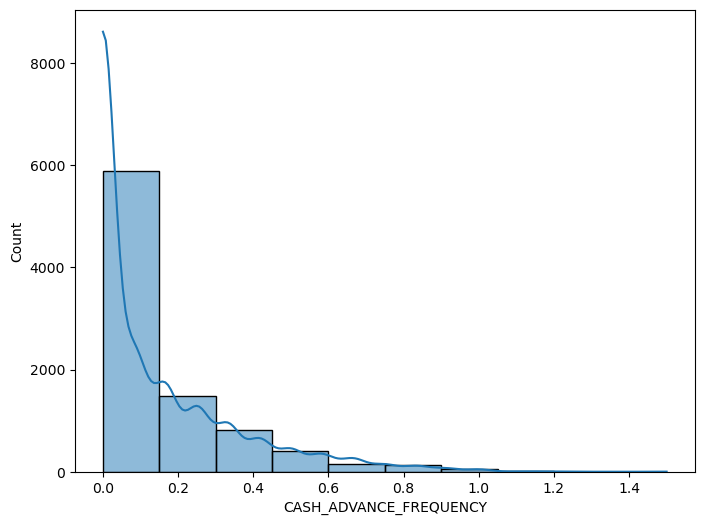

In [57]:
plt.figure(figsize=(8, 6)) 
sns.histplot(data["CASH_ADVANCE_FREQUENCY"], bins=10, kde=True)

<Axes: ylabel='CASH_ADVANCE_FREQUENCY'>

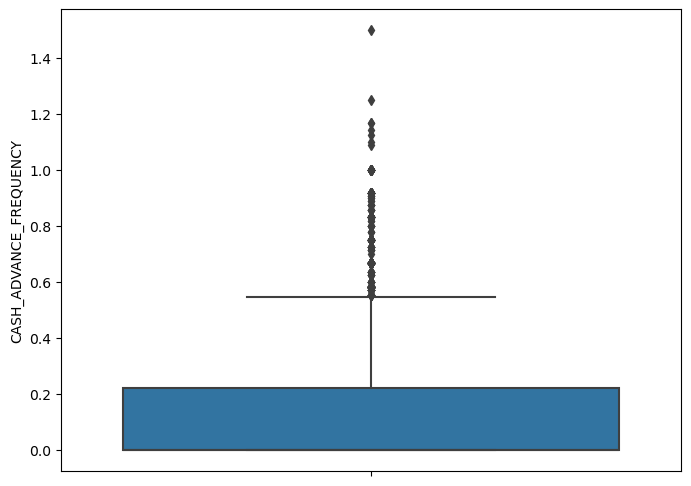

In [58]:
plt.figure(figsize = (8,6))
sns.boxplot(y = data["CASH_ADVANCE_FREQUENCY"])

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Data Processing


## Data Cleaning


## Feature Engineering
Cree al menos 2 variables nuevas


## Encoding


## Scaling (if needed)


## # Train model/Tune hyperparameters 

Explique el criterio utilizado

In [ ]:
# Método del Codo
sse = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_preprocessed)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_preprocessed, kmeans.labels_))

In [ ]:
# Gráfico del método del Codo
plt.figure(figsize=(10, 6))
plt.plot(K, sse, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.show()

# Gráfico del Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes K')
plt.show()

In [6]:
# Ejemplo DBSCAN

param_grid = {
    'eps': [0.1, 0.2, 0.3, 0.5, 0.7],  # Distancia de radio
    'min_samples': [3, 5, 10]  # Número mínimo de puntos para formar un cluster
}

# Variable para almacenar los mejores resultados
best_score = -1
best_params = {}

# Búsqueda manual (Grid Search)
for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        # Definir el modelo con los parámetros actuales
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        
        # Ajustar el modelo
        labels = dbscan.fit_predict(df_preprocessed)
        
        # Verificar que haya clusters generados, ya que DBSCAN puede generar ruido (label -1)
        if len(set(labels)) > 1:  # Necesitamos al menos 2 clusters para calcular el Silhouette Score
            # Evaluar el modelo con Silhouette Score
            score = silhouette_score(df_preprocessed, labels)
            
            # Guardar si es el mejor score
            if score > best_score:
                best_score = score
                best_params = {
                    'eps': eps,
                    'min_samples': min_samples
                }

# Imprimir los mejores parámetros y el mejor score
print(f"Mejores Parámetros: {best_params}")
print(f"Mejor Silhouette Score: {best_score:.4f}")


Mejores Parámetros: {'eps': 0.7, 'min_samples': 3}
Mejor Silhouette Score: 0.6978


In [ ]:
# best_model = KMeans(random_state=42,n_clusters=K)
# best_model = KMedoids(random_state=42,n_clusters=K)

# best_model = DBSCAN(**best_params)
# best_model = AgglomerativeClustering(**best_params)

In [ ]:
best_model.fit(df_preprocesssed)

# Visualization of clusters

In [ ]:
# Numerical variable distribution among clusters
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
cols = ['VAR_NUM1', 'VAR_NUM2', 'VAR_NUM3']
for i in range(len(cols)):
    sns.boxplot(data=df, x='CLUSTER', y=cols[i], ax=axs[i])
fig.suptitle('Numerical Variable Distribution Among Clusters')
plt.tight_layout()
plt.show()

# Interpretation of clusters

In [ ]:
EJEMPLO

1. Cluster 0. Clientes con ingreso anual intermedio y score de gasto anual intermedio
2. Cluster 1. Clientes con bajo ingreso anual y alto score de gasto anual
3. Cluster 2. Clientes con alto ingreso anual y alto score de gasto anual
4. Cluster 3. Clientes con alto ingreso anual y bajo score de gasto anual